In [1]:
"""Benchmark h5py performance with different setups.
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data slicing
*Question*: Is there a performance difference in slicing data during h5py load or after

In [13]:
data = pd.read_csv("./benchmark_h5py.csv")
data["% Size"] = [
    100 * np.prod([x/y for x,y in zip(eval(xs),eval(ys))]) 
    for xs, ys in zip(data["block_size"], data["total_size"])
]
data = data.drop(["Unnamed: 0", "block_size", "total_size"], axis=1)
data["Time Difference (s)"] = data["Method 1 (H5)"] - data["Method 2 (Numpy)"]
data["% Time Difference"] = data["Time Difference (s)"] / data["Method 2 (Numpy)"]
display(data)

,Files,Method 1 (H5),Method 2 (Numpy),seed,% Size,Time Difference (s),% Time Difference
0,0000001_V00.h5,0.028774,0.996118,7001,0.004239,-0.967344,-0.971114
1,0000001_V01.h5,0.074322,1.022790,7001,0.004239,-0.948469,-0.927334
2,0000002_V00.h5,0.062111,1.130267,7001,0.004239,-1.068156,-0.945047
3,0000002_V01.h5,0.066133,1.041522,7001,0.004239,-0.975389,-0.936504
4,0000003_V00.h5,0.195448,1.024537,7001,0.004239,-0.829089,-0.809233
...,...,...,...,...,...,...,...
4219,2000012_V01.h5,1.111929,1.087666,9001,100.000000,0.024263,0.022308
4220,2000013_V00.h5,1.157360,1.057483,9001,100.000000,0.099877,0.094447
4221,2000013_V01.h5,1.120696,1.087010,9001,100.000000,0.033685,0.030989
4222,2000014_V00.h5,1.035439,1.152222,9001,100.000000,-0.116783,-0.101354


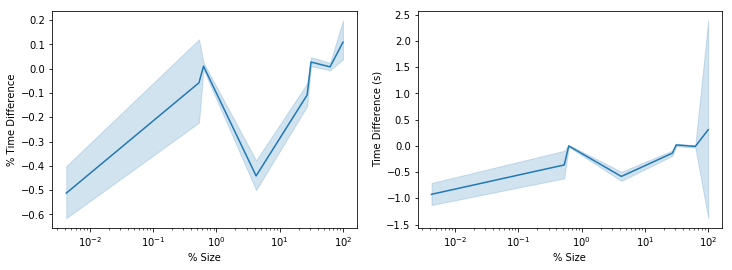

In [14]:
f, axs = plt.subplots(ncols=2, figsize=(12, 4))
axs = axs.flatten()
for ax, y_name in zip(axs, ["% Time Difference", "Time Difference (s)"]):
    ax.set(xscale="log")
    sns.lineplot(data=data, x="% Size", y=y_name, ax=ax)